# Advanced Spatial Analyis II - Data Challenge
### Adrian Hauser 17-715-962

In [120]:
#Imports
import pandas as pd
import numpy as np
import geopandas as gpd
from datetime import datetime as dt
from datetime import timedelta
import geopy.distance
from shapely.geometry import point


In [8]:
# Import Data
df = pd.read_csv(r"C:\Users\adria\Documents\8_GEO_FS23\GEO881_Advanced_Spatial_Analysis_II\201903-citibike-tripdata.csv")

# Cast Date strings to datetime
df.starttime = pd.to_datetime(df.starttime)
df.stoptime = pd.to_datetime(df.stoptime)

print(df.dtypes)


tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id                  float64
start station name                 object
start station latitude            float64
start station longitude           float64
end station id                    float64
end station name                   object
end station latitude              float64
end station longitude             float64
bikeid                              int64
usertype                           object
birth year                          int64
gender                              int64
dtype: object


In [4]:
# 1. How many tripy are reported in the date?

print(len(df))

1327960


In [7]:
# 2. What is the earliest time of the day any trip starts?

print(min(df.starttime.dt.time))

00:00:00.236000


In [32]:
# 3. How many stations are used?
df_station = pd.concat([df['start station id'], df['end station id']])
df_station.nunique()

773

In [34]:
# 4. What is the mean number of trips per day?
df.groupby(df.starttime.dt.day).size().mean()


42837.41935483871

In [40]:
# 5. What ist the mean number of trips on Sundays?
df_sunday = df[df.starttime.dt.dayofweek == 6]
df_sunday.groupby(df_sunday.starttime.dt.day).size().mean()

32406.8

In [48]:
# 6. On which day did most trips start?

df_trips = df.groupby(df.starttime.dt.date).size().idxmax()
print(df_trips)

2019-03-30


In [82]:
# How many trips did start that day

# Get the subset on the specific day
df_most_trips = df[df.starttime.dt.date == df_trips]

# Set starttime to index to use .between_time()
df_most_trips.set_index('starttime', inplace=True)
len(df_most_trips.between_time(start_time='11:00', end_time='15:00'))

23162

In [99]:
# What is the duration of the longest trip?

str(timedelta(seconds=max(df.tripduration)))

'34 days, 8:56:21'

In [101]:
# 9. What is the 99% quantile of trip durations

str(timedelta(seconds=df.tripduration.quantile(q= 0.99)))

'0:52:11'

<AxesSubplot: ylabel='Frequency'>

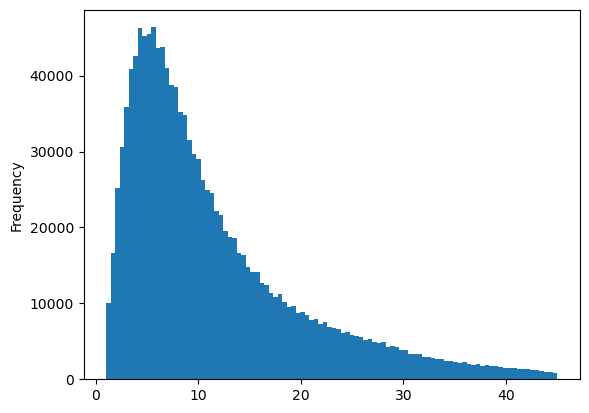

In [109]:
df_shorter = df[df.tripduration/60 <= 45]['tripduration']/60
df_shorter.plot.hist(bins=100, x)


In [132]:
# What is the median beeline distance travelled

df['start_coordinate'] = list(zip(df['start station longitude'], df['start station latitude']))
df['end_coordinate'] = list(zip(df['end station longitude'], df['end station latitude']))

def distancer(row):
    coords_1 = (row['start_coordinate'])
    coords_2 = (row['end_coordinate'])
    return geopy.distance.geodesic(coords_1, coords_2).km

df['distance'] = df.apply(distancer, axis=1)

In [133]:
df['distance'] = geopy.distance.geodesic(df.start_coordinate,df.end_coordinate).km

ValueError: When creating a Point from sequence, it must not have more than 3 items.

In [136]:
df.distance.median()

0.9921536149380566